In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv(r'../data/training_data.csv')
df.head(20)

,date_id,item_dept,item_qty,net_sales,store,item,invoice_num
0,11/1/2021,Grocery,1.000,160.000,XYZ,16620,1475459.0
1,11/1/2021,Grocery,2.000,480.000,XYZ,32365,1475459.0
2,11/1/2021,Grocery,1.000,127.000,XYZ,31349,1475459.0
3,11/1/2021,Household,2.000,110.000,XYZ,1266,1475475.0
4,11/1/2021,Household,1.000,150.000,XYZ,114920,1475475.0
5,11/1/2021,Household,1.000,745.000,XYZ,115596,1475475.0
6,11/1/2021,Grocery,1.000,175.000,XYZ,98654,1475475.0
7,11/1/2021,Grocery,3.000,120.000,XYZ,8373,1475475.0
8,11/1/2021,Grocery,1.000,194.000,XYZ,106669,1475521.0
9,11/1/2021,Household,1.000,137.000,XYZ,75008,1475521.0


In [3]:
df.columns

Index(['date_id', 'item_dept', 'item_qty', 'net_sales', 'store', 'item',
       'invoice_num'],
      dtype='object')

In [4]:
df['date_id'] = pd.to_datetime(df['date_id'], format='%m/%d/%Y')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614098 entries, 0 to 614097
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   date_id      614098 non-null  datetime64[ns]
 1   item_dept    614098 non-null  object        
 2   item_qty     614098 non-null  float64       
 3   net_sales    614098 non-null  float64       
 4   store        614098 non-null  object        
 5   item         614098 non-null  int64         
 6   invoice_num  591288 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(2)
memory usage: 32.8+ MB


In [6]:
df.describe()

,date_id,item_qty,net_sales,item,invoice_num
count,614098,614098.000000,614098.000000,614098.00000,5.912880e+05
mean,2021-12-16 16:21:54.693094912,1.533792,335.067969,67622.41479,4.231954e+06
min,2021-11-01 00:00:00,-59.000000,-15250.000000,906.00000,1.475419e+06
25%,2021-11-25 00:00:00,1.000000,124.000000,14340.00000,2.581947e+06
50%,2021-12-17 00:00:00,1.000000,215.000000,89725.00000,4.597865e+06
75%,2022-01-08 00:00:00,1.668000,371.000000,117021.00000,5.598286e+06
max,2022-01-31 00:00:00,880.000000,316880.280000,124146.00000,9.354809e+06
std,NaN,3.058092,824.733169,48909.65677,1.704178e+06


In [9]:
df['item_dept'].value_counts()

item_dept
Grocery      337991
Household    153951
Beverages    122156
Name: count, dtype: int64

In [10]:
df['store'].value_counts()

store
XYZ    340659
ABC    273439
Name: count, dtype: int64

In [11]:
df['item'].value_counts()

item
9609      7852
22344     7769
1974      6245
14597     5445
996       4678
          ... 
112000       1
123495       1
122969       1
121854       1
112017       1
Name: count, Length: 5143, dtype: int64

In [12]:
df['invoice_num'].value_counts()

invoice_num
3129061.0    108
3136241.0     98
7125274.0     95
3438647.0     95
3139627.0     93
            ... 
2562283.0      1
2562287.0      1
2562316.0      1
2562513.0      1
5808318.0      1
Name: count, Length: 136756, dtype: int64

In [13]:
df['date_id'].value_counts()

date_id
2021-12-31    10752
2021-12-24     8840
2021-11-28     8541
2021-12-30     8171
2021-11-27     8031
              ...  
2021-11-23     5447
2022-01-05     5415
2021-11-22     5315
2022-01-03     5274
2021-11-24     5027
Name: count, Length: 92, dtype: int64

### Univariate Analysis

In [14]:
store_value_counts = df['store'].value_counts()

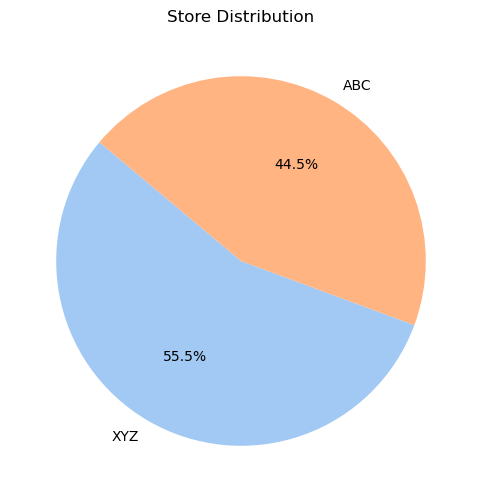

In [15]:
# Plotting the pie chart
plt.figure(figsize=(6, 6))
plt.pie(store_value_counts, labels=store_value_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('pastel'))
plt.title('Store Distribution')
plt.show()

In [16]:
dept_value_counts = df['item_dept'].value_counts()

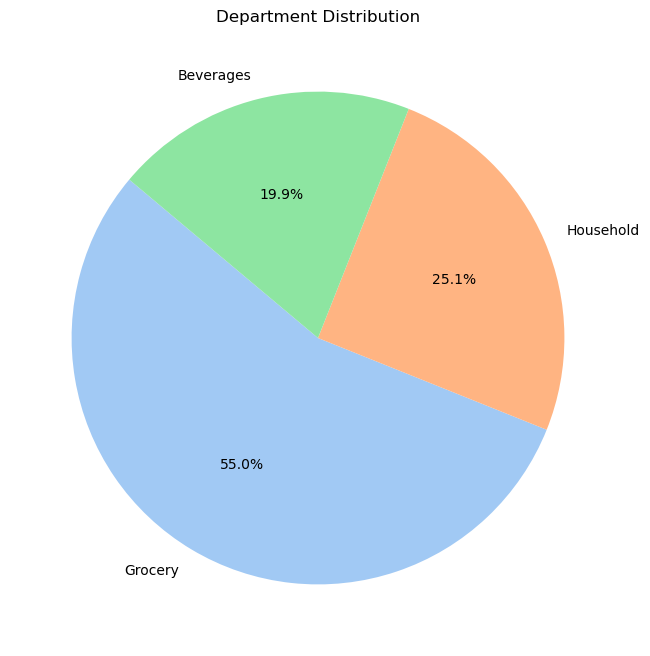

In [17]:
# Plotting the pie chart
plt.figure(figsize=(8, 8))
plt.pie(dept_value_counts, labels=dept_value_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('pastel'))
plt.title('Department Distribution')
plt.show()

In [23]:
item_value_counts = df['item'].value_counts()
top_25_items = item_value_counts.sort_values(ascending=False).head(25)

In [24]:
top_25_items

item
9609      7852
22344     7769
1974      6245
14597     5445
996       4678
57099     3893
121362    3596
2818      3438
3235      3275
106668    3258
26316     3115
111698    2978
4986      2838
15566     2450
28516     2299
49898     2266
25050     2210
100266    2132
5090      2098
66458     1998
3210      1906
120641    1814
112358    1813
14985     1757
43450     1724
Name: count, dtype: int64

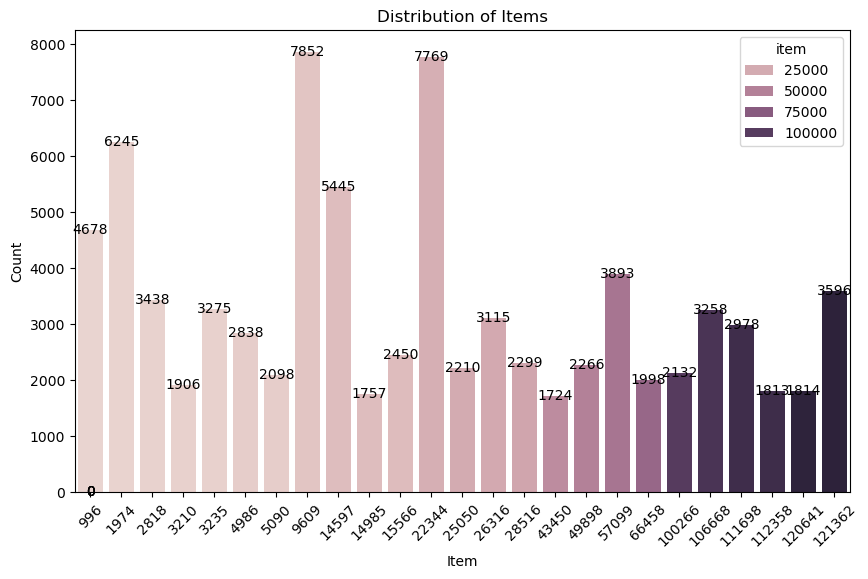

In [30]:
# Plotting the bar chart
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=top_25_items.index, y=top_25_items.values, hue = top_25_items.index)

# Adding the count labels on top of each bar
for p in ax.patches:
    ax.text(p.get_x() + p.get_width() / 2., p.get_height() + 0.5,
            f'{int(p.get_height())}', ha='center', va='center')

# Adding labels and title
plt.xlabel('Item')
plt.ylabel('Count')
plt.title('Distribution of Items')
plt.xticks(rotation=45)  # Rotate the x-axis labels if needed
plt.show()

In [28]:
botton_25_items = item_value_counts.sort_values(ascending=False).tail(25)

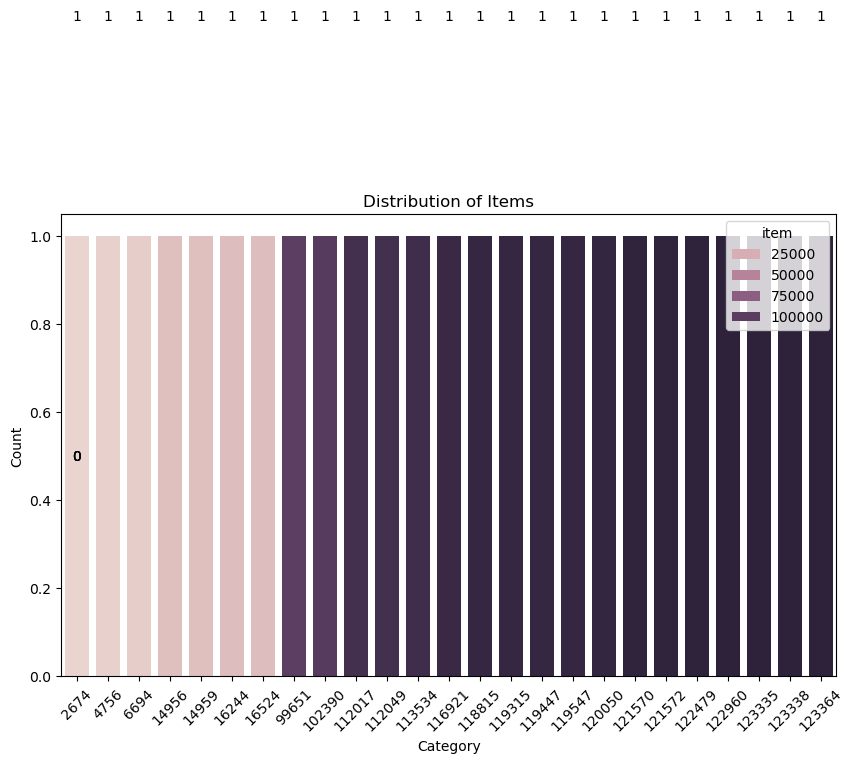

In [29]:
# Plotting the bar chart
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=botton_25_items.index, y=botton_25_items.values, hue = botton_25_items.index)

# Adding the count labels on top of each bar
for p in ax.patches:
    ax.text(p.get_x() + p.get_width() / 2., p.get_height() + 0.5,
            f'{int(p.get_height())}', ha='center', va='center')

# Adding labels and title
plt.xlabel('Category')
plt.ylabel('Count')
plt.title('Distribution of Items')
plt.xticks(rotation=45)  # Rotate the x-axis labels if needed
plt.show()

In [31]:
invoice_value_counts = df['invoice_num'].value_counts()
top_10_invoice = invoice_value_counts.head(10)

In [32]:
top_10_invoice

invoice_num
3129061.0    108
3136241.0     98
7125274.0     95
3438647.0     95
3139627.0     93
4608136.0     88
4964778.0     86
6570161.0     82
5806196.0     78
1492286.0     77
Name: count, dtype: int64

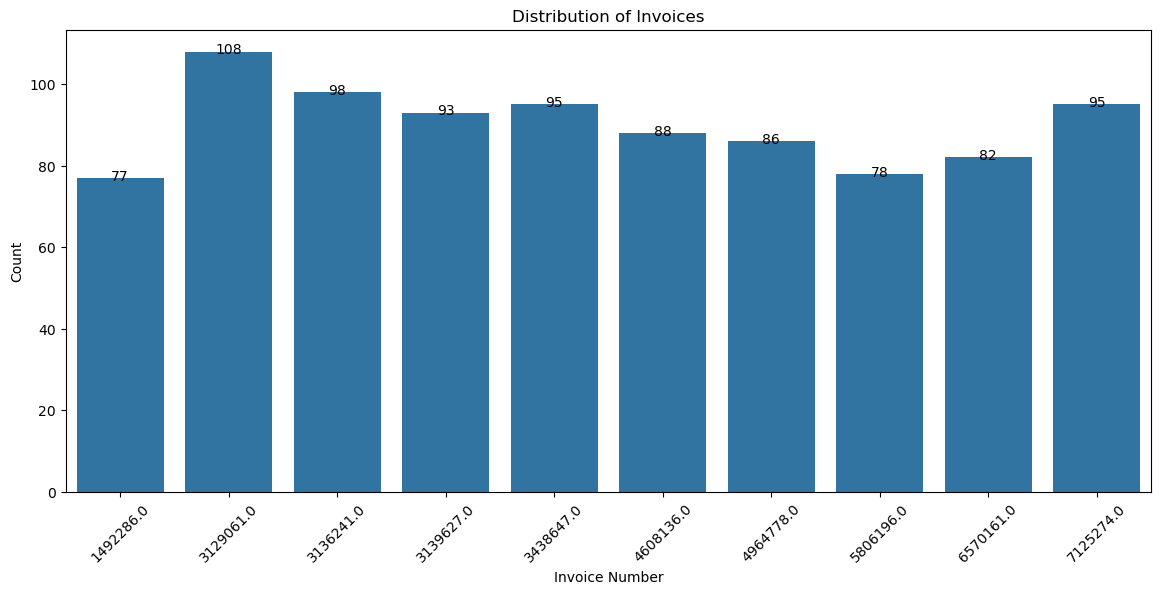

In [36]:
# Plotting the bar chart
plt.figure(figsize=(14, 6))
ax = sns.barplot(x=top_10_invoice.index, y=top_10_invoice.values)

# Adding the count labels on top of each bar
for p in ax.patches:
    ax.text(p.get_x() + p.get_width() / 2., p.get_height() + 0.5,
            f'{int(p.get_height())}', ha='center', va='center')

# Adding labels and title
plt.xlabel('Invoice Number')
plt.ylabel('Count')
plt.title('Distribution of Invoices')
plt.xticks(rotation=45)  # Rotate the x-axis labels if needed
plt.show()

In [51]:
df['net_sales'].describe()

count    614098.000000
mean        335.067969
std         824.733169
min      -15250.000000
25%         124.000000
50%         215.000000
75%         371.000000
max      316880.280000
Name: net_sales, dtype: float64

<Axes: xlabel='net_sales'>

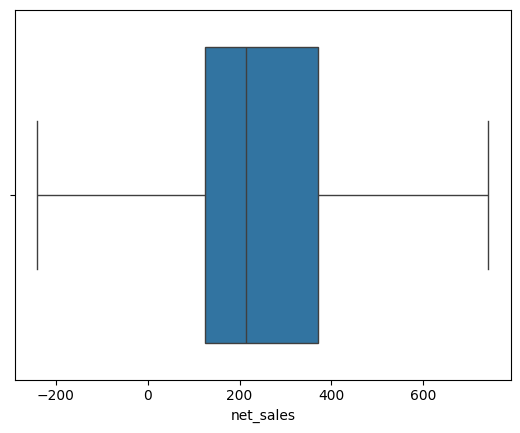

In [53]:
sns.boxplot(x=df["net_sales"], showfliers=False)

<AxesSubplot:xlabel='item_qty'>

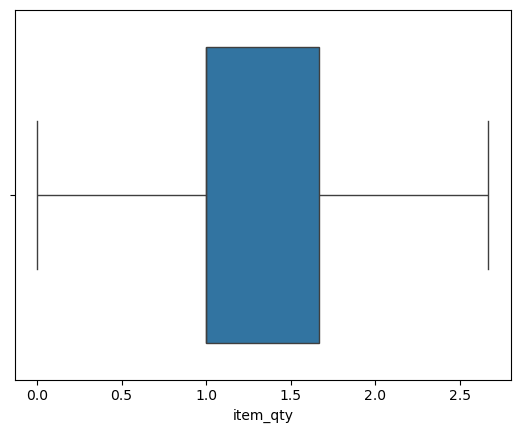

In [40]:
sns.boxplot(x=df["item_qty"], showfliers=False)

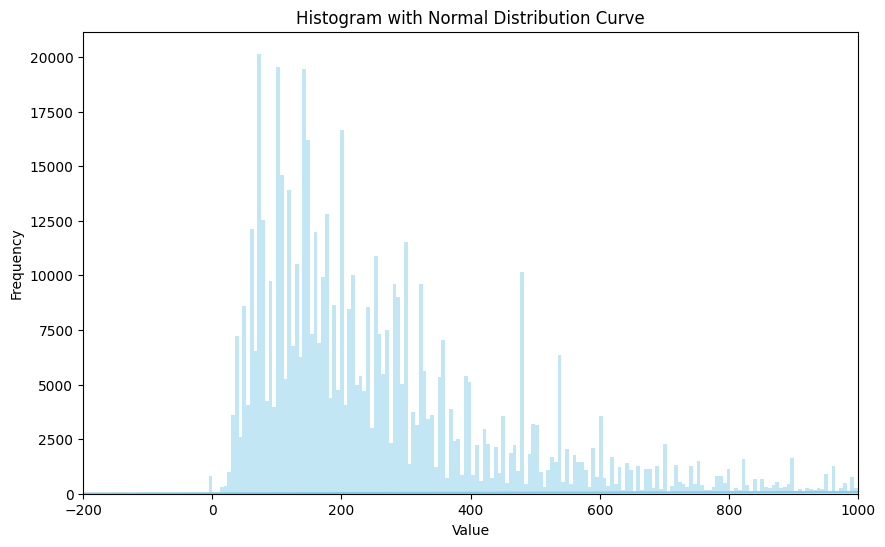

In [55]:
# Plotting the histogram with a normal distribution curve
plt.figure(figsize=(10, 6))
sns.histplot(df['net_sales'].values, kde=True, color='skyblue')

# Adding labels and title
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram with Normal Distribution Curve')
plt.xlim(-200,1000)
plt.show()

### Multivariate Analysis

<Axes: xlabel='net_sales', ylabel='item_dept'>

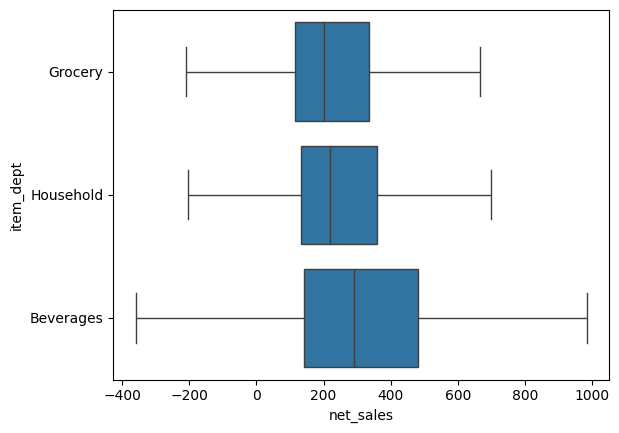

In [56]:
sns.boxplot(x=df["net_sales"], y=df['item_dept'], showfliers=False)

<Axes: xlabel='net_sales', ylabel='store'>

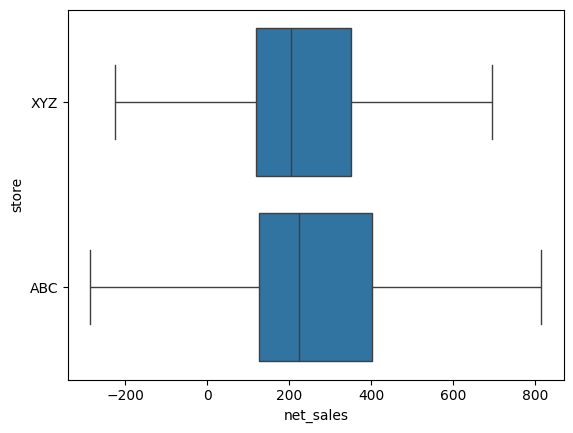

In [57]:
sns.boxplot(x=df["net_sales"], y=df['store'], showfliers=False)

<Axes: xlabel='item_qty', ylabel='net_sales'>

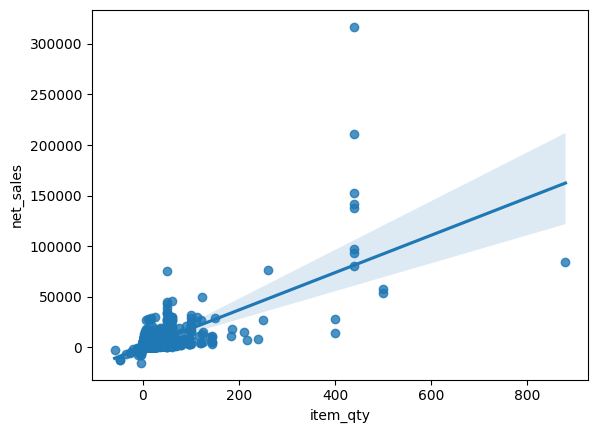

In [62]:
sns.regplot(data=df, x="item_qty", y="net_sales", order=1)

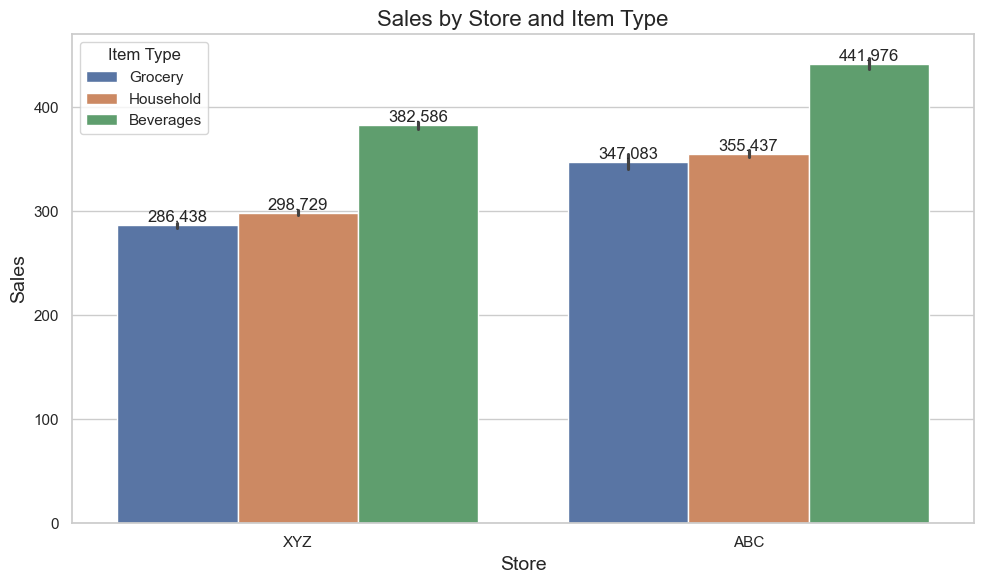

In [72]:
# Set the aesthetic style of the plots
sns.set(style="whitegrid")

# Create the multi-bar chart
plt.figure(figsize=(10, 6))
bar_plot = sns.barplot(data=df, x='store', y='net_sales', hue='item_dept')

# Add counts on top of each bar
for container in bar_plot.containers:
    bar_plot.bar_label(container)

# Add titles and labels
plt.title('Sales by Store and Item Type', fontsize=16)
plt.xlabel('Store', fontsize=14)
plt.ylabel('Sales', fontsize=14)
plt.legend(title='Item Type')

# Show the plot
plt.tight_layout()
plt.show()

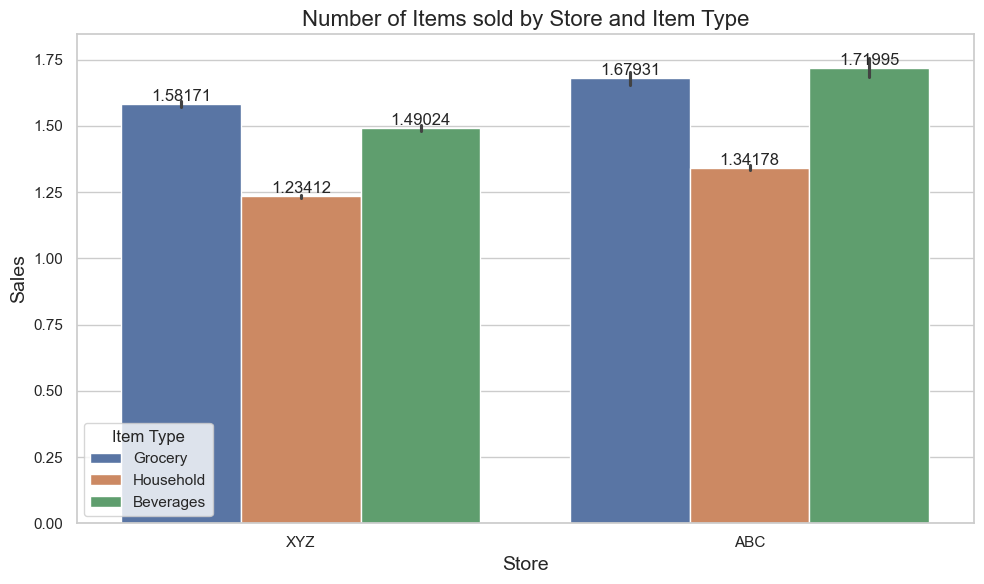

In [69]:
# Set the aesthetic style of the plots
sns.set(style="whitegrid")

# Create the multi-bar chart
plt.figure(figsize=(10, 6))
bar_plot = sns.barplot(data=df, x='store', y='item_qty', hue='item_dept')

# Add counts on top of each bar
for container in bar_plot.containers:
    bar_plot.bar_label(container)

# Add titles and labels
plt.title('Number of Items sold by Store and Item Type', fontsize=16)
plt.xlabel('Store', fontsize=14)
plt.ylabel('Sales', fontsize=14)
plt.legend(title='Item Type')

# Show the plot
plt.tight_layout()
plt.show()

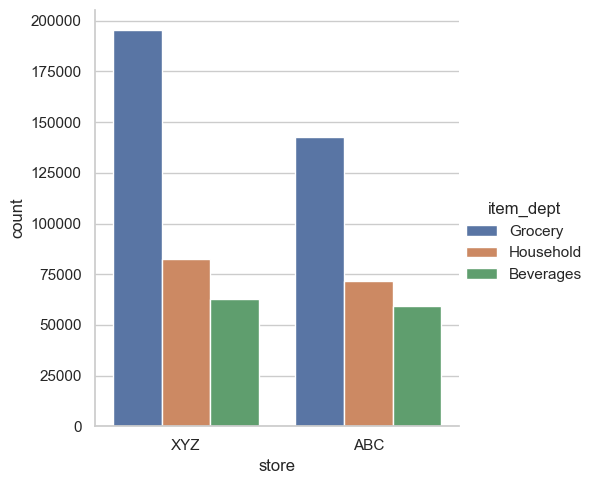

In [77]:
cat_plot = sns.catplot(data=df, x="store", kind="count", hue='item_dept')
plt.show()

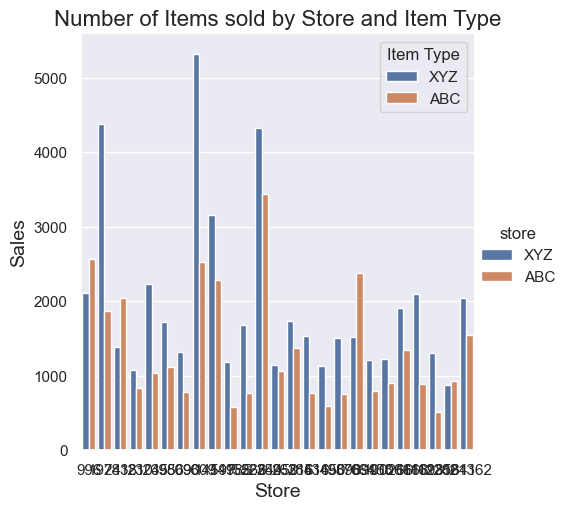

In [89]:
sns.set_theme(rc={'figure.figsize':(16,12)})
cat_plot = sns.catplot(data=df[df['item'].isin(top_25_items.index)], x="item", kind="count", hue='store')
# Add titles and labels
plt.title('Number of Items sold by Store and Item Type', fontsize=16)
plt.xlabel('Store', fontsize=14)
plt.ylabel('Sales', fontsize=14)
plt.legend(title='Item Type')
plt.show()

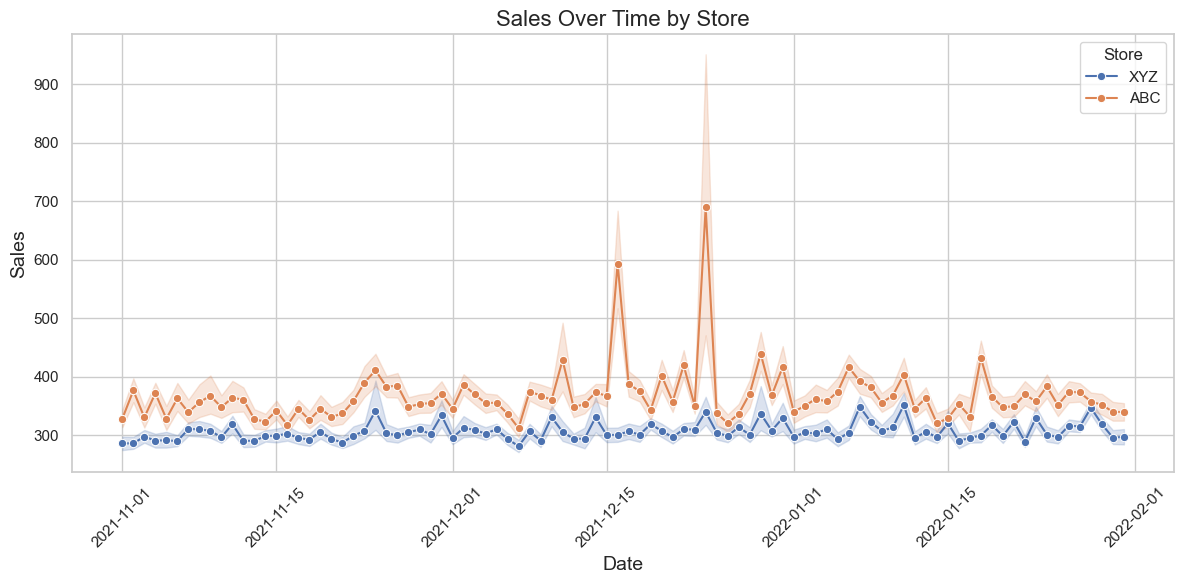

In [41]:
# Set the aesthetic style of the plots
sns.set(style="whitegrid")

# Create the line plot
plt.figure(figsize=(12, 6))
line_plot = sns.lineplot(data=df, x='date_id', y='net_sales', hue='store', marker='o')

# Add titles and labels
plt.title('Sales Over Time by Store', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Sales', fontsize=14)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.legend(title='Store')

# Show the plot
plt.tight_layout()
plt.show()

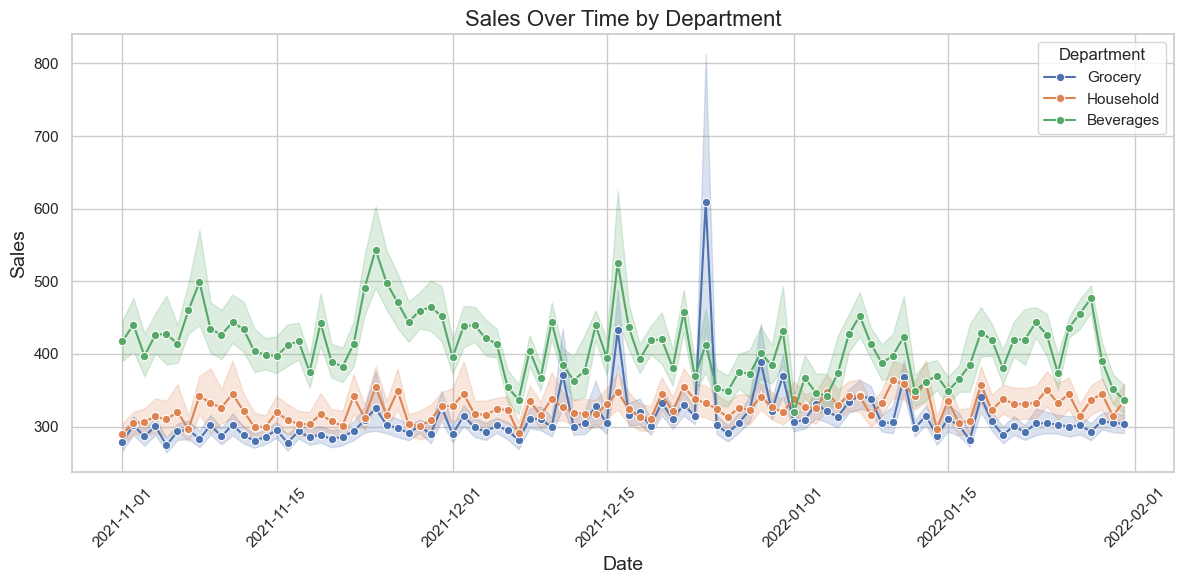

In [91]:
# Set the aesthetic style of the plots
sns.set(style="whitegrid")

# Create the line plot
plt.figure(figsize=(12, 6))
line_plot = sns.lineplot(data=df, x='date_id', y='net_sales', hue='item_dept', marker='o')

# Add titles and labels
plt.title('Sales Over Time by Department', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Sales', fontsize=14)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.legend(title='Department')

# Show the plot
plt.tight_layout()
plt.show()

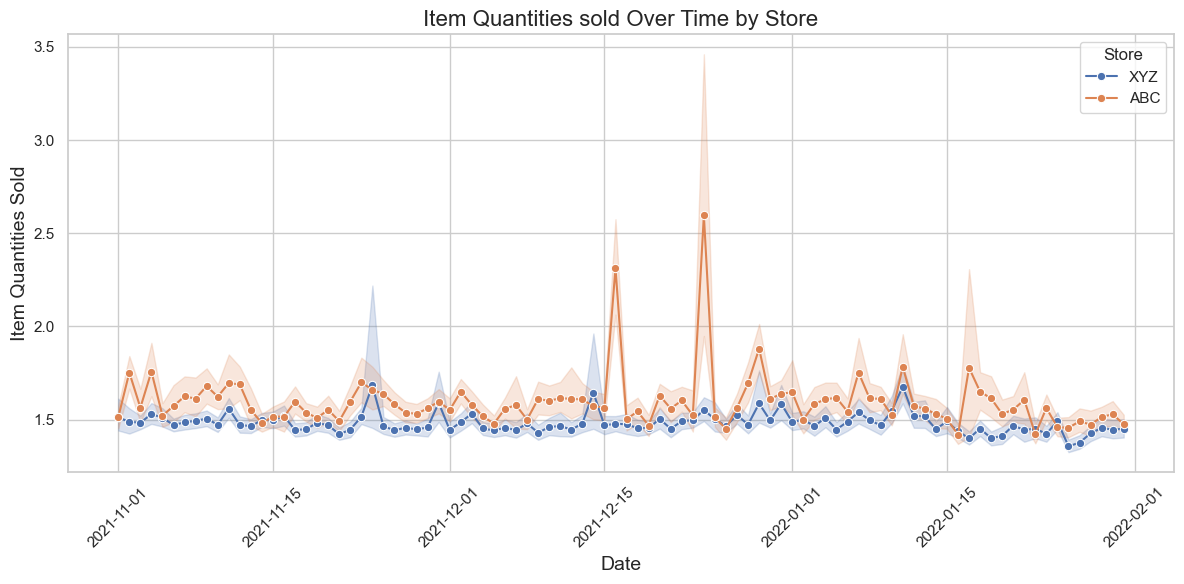

In [42]:
# Set the aesthetic style of the plots
sns.set(style="whitegrid")

# Create the line plot
plt.figure(figsize=(12, 6))
line_plot = sns.lineplot(data=df, x='date_id', y='item_qty', hue='store', marker='o')

# Add titles and labels
plt.title('Item Quantities sold Over Time by Store', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Item Quantities Sold', fontsize=14)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.legend(title='Store')

# Show the plot
plt.tight_layout()
plt.show()

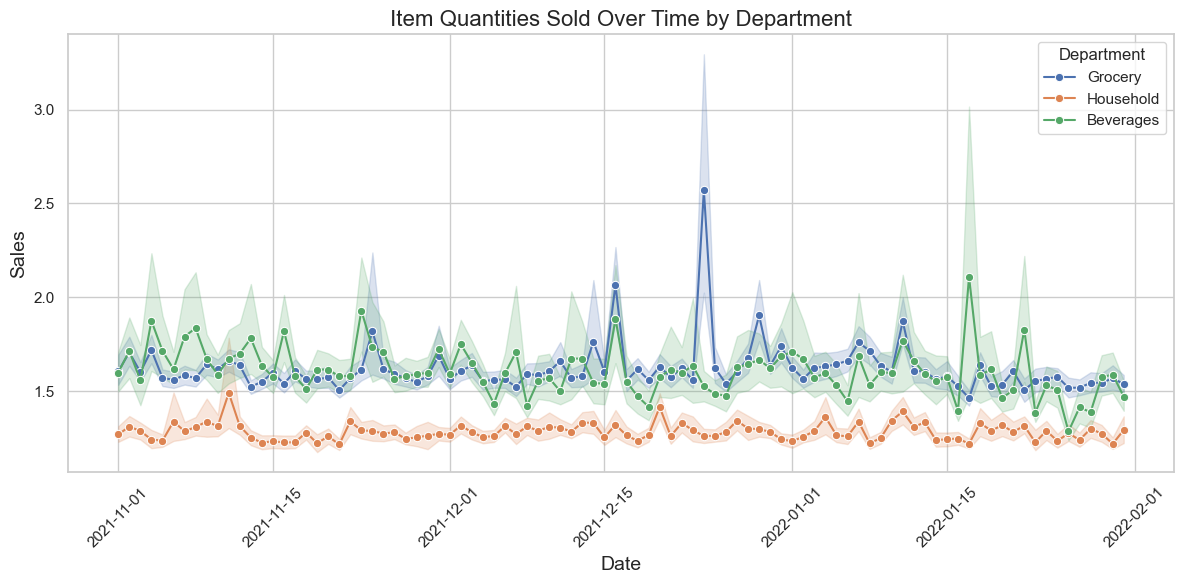

In [48]:
# Set the aesthetic style of the plots
sns.set(style="whitegrid")

# Create the line plot
plt.figure(figsize=(12, 6))
line_plot = sns.lineplot(data=df, x='date_id', y='item_qty', hue='item_dept', marker='o')

# Add titles and labels
plt.title('Item Quantities Sold Over Time by Department', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Sales', fontsize=14)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.legend(title='Department')

# Show the plot
plt.tight_layout()
plt.show()

In [45]:
top_item = df['item'].value_counts().head(1)

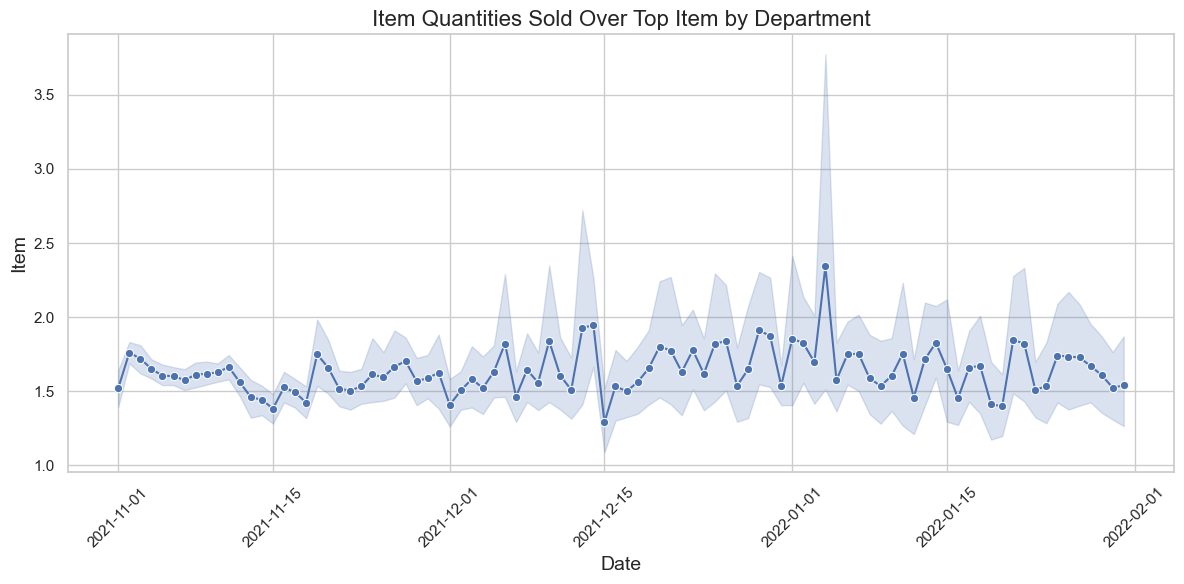

In [46]:
# Set the aesthetic style of the plots
sns.set(style="whitegrid")

# Create the line plot
plt.figure(figsize=(12, 6))
line_plot = sns.lineplot(data=df[df['item'].isin(top_item.index)], x='date_id', y='item_qty', marker='o')

# Add titles and labels
plt.title('Item Quantities Sold Over Top Item by Department', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Item', fontsize=14)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

# Show the plot
plt.tight_layout()
plt.show()

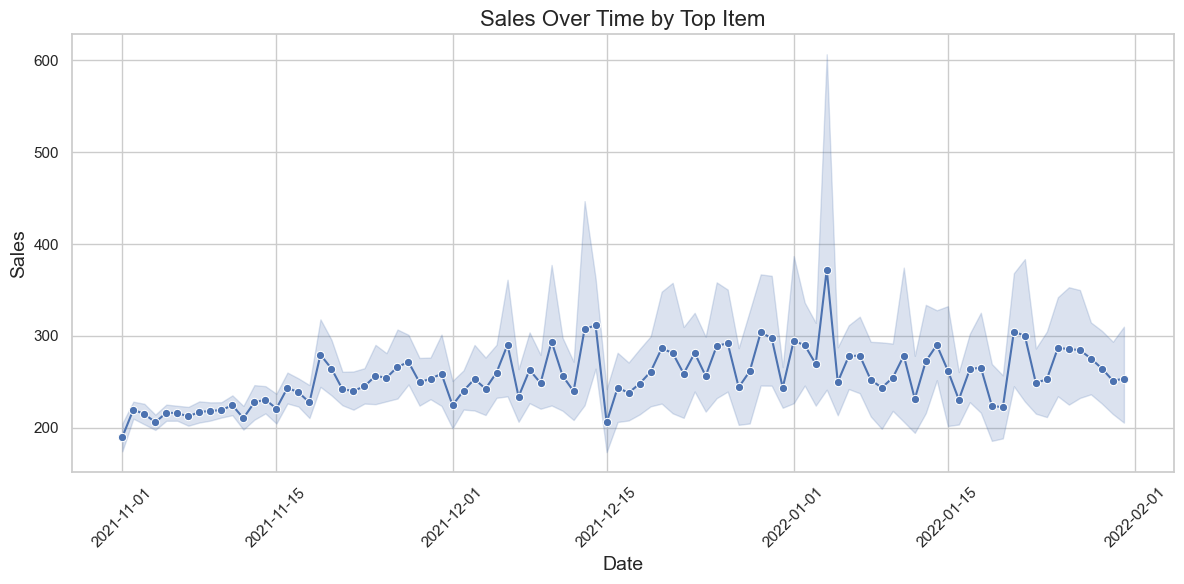

In [47]:
# Set the aesthetic style of the plots
sns.set(style="whitegrid")

# Create the line plot
plt.figure(figsize=(12, 6))
line_plot = sns.lineplot(data=df[df['item'].isin(top_item.index)], x='date_id', y='net_sales', marker='o')

# Add titles and labels
plt.title('Sales Over Time by Top Item', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Sales', fontsize=14)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

# Show the plot
plt.tight_layout()
plt.show()